In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
y_train = pd.read_csv('datasets/train.csv')
y_train.label.value_counts()[0]
y_train.label.value_counts()[1:].sum()

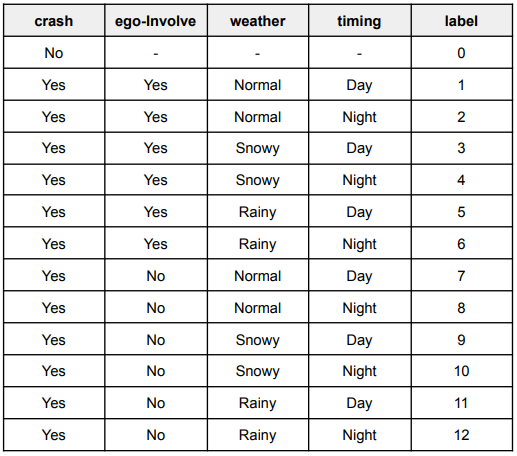

In [32]:
rule = pd.DataFrame(np.zeros(shape=(12,4)))
rule.columns = ['involve', 'weather', 'timing', 'label']
rule['involve'] = np.array(['yes']*6 + ['no']*6)
rule['weather'] = np.array(list(['normal']*2 + ['snowy']*2 + ['rainy']*2)*2)
rule['timing'] = np.array(['day','night']*6)
rule['label'] = np.array(np.arange(1,13))
rule

In [56]:
crashed = y_train.iloc[np.where(y_train.label != 0)[0]]
crashed['involve'] = np.where(crashed.label.isin([1,2,3,4,5,6]), 'yes', 'no')
crashed['weather'] = np.where(crashed.label.isin([1,2,7,8]), 'normal', np.where(crashed.label.isin([3,4,9,10]), 'snowy', 'rainy'))
crashed['timing'] = np.where(crashed.label.isin([1,3,5,7,9,11]), 'day', 'night')

/var/folders/zc/5b1gl8616ld1mkmyd4zbjxpc0000gn/T/ipykernel_4333/1496175593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashed['involve'] = np.where(crashed.label.isin([1,2,3,4,5,6]), 'yes', 'no')
/var/folders/zc/5b1gl8616ld1mkmyd4zbjxpc0000gn/T/ipykernel_4333/1496175593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashed['weather'] = np.where(crashed.label.isin([1,2,7,8]), 'normal', np.where(crashed.label.isin([3,4,9,10]), 'snowy', 'rainy'))
/var/folders/zc/5b1gl8616ld1mkmyd4zbjxpc0000gn/T/

In [57]:
crashed

,sample_id,video_path,label,involve,weather,timing
0,TRAIN_0000,./train/TRAIN_0000.mp4,7,no,normal,day
1,TRAIN_0001,./train/TRAIN_0001.mp4,7,no,normal,day
4,TRAIN_0004,./train/TRAIN_0004.mp4,1,yes,normal,day
6,TRAIN_0006,./train/TRAIN_0006.mp4,3,yes,snowy,day
7,TRAIN_0007,./train/TRAIN_0007.mp4,7,no,normal,day
...,...,...,...,...,...,...
2685,TRAIN_2685,./train/TRAIN_2685.mp4,8,no,normal,night
2689,TRAIN_2689,./train/TRAIN_2689.mp4,1,yes,normal,day
2692,TRAIN_2692,./train/TRAIN_2692.mp4,7,no,normal,day
2693,TRAIN_2693,./train/TRAIN_2693.mp4,3,yes,snowy,day


In [62]:
for key in crashed.columns[3:6].values.tolist():
    print(crashed[key].value_counts())

yes    491
no     424
Name: involve, dtype: int64
normal    716
snowy     129
rainy      70
Name: weather, dtype: int64
day      808
night    107
Name: timing, dtype: int64


<AxesSubplot:>

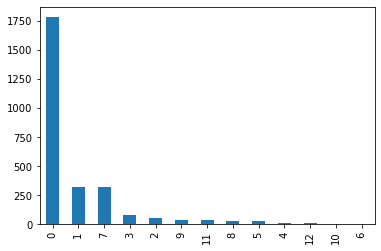

In [15]:
y_train.label.value_counts().plot(kind='bar')